#Machine Learning (revisited Andrew Ng's [script](http://cs229.stanford.edu/materials.html))
##Linear Regression and local weighted version
The model should be Y = WX+B. Solution is Least Mean Square to minize sum_i(w_i*x_i-y_i)^2 over w_i and weighted version sum_i(a_i*(w_i*x_i-y_i)^2) where a_i = exp(-(x_i - x_m)^2/r^2). Beside directly computing the with LMS formula, we have a "updating" version to search the minimal. For more details please take a look at Andrew's course note.
##Logistic Regression
Logistic/Sigmoid function 'G' is:

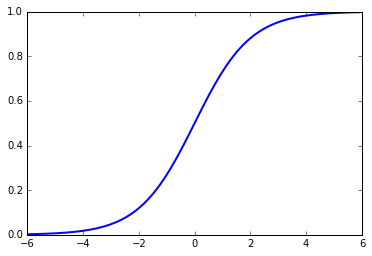

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-6.0, 6.0, 0.1)
plt.plot(x, 1/(1+ np.exp(-x)), linewidth=2)

plt.show()

Our model is G(WX+B). Solution is complicate, but searching method is similar to "update" version of Linear Regression. If we digress the G to be binary function that output either 0 or 1. This model can be called perceptron learning...

#Softmax

Softmax is a function to map score into probabilities (why we need a map? why doesn't score just output the probabilities?)

[ 0.8360188   0.11314284  0.05083836] and its sum 1.0


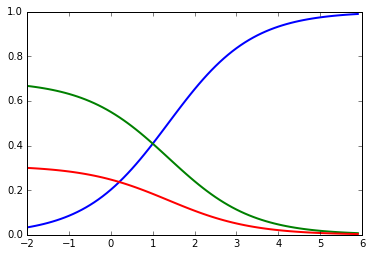

In [31]:
%matplotlib inline
"""Softmax."""

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/np.sum(np.exp(x), axis = 0);


print(str(softmax(scores)) + ' and its sum ' + str(np.sum(softmax(scores))))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
# What's np.ones_like(x)
#print(np.ones_like(x))
#print(scores)

plt.plot(x, softmax(scores).T, linewidth=2)
# What's this T
#print(softmax(scores).T)

plt.show()

This is to plot all the points after mapped to probability like [-2.0, 1.0, 0.2] [-1.9, 1.0, 0.2] ... To study the behavior of this softmax function we multiply the scores by 10 and 0.1 to see how it will be.

In [32]:
print(softmax([x*10 for x in [3.0, 1.0, 0.2]]))
print(softmax([x*0.1 for x in [3.0, 1.0, 0.2]]))

[  9.99999998e-01   2.06115362e-09   6.91440009e-13]
[ 0.38842275  0.31801365  0.2935636 ]


#One Hot Encoding
Quara has an answer that explains a little bit: 
```
One hot encoding transforms:

a single variable with n observations and d distinct values, 

to

to d binary variables with n observations each. Each observation indicating the presence (1) or absence (0) of the dth binary variable.

e.g. [house, car, tooth, car] becomes 
[[1,0,0,0],
[0,1,0,1],
[0,0,1,0]]
```
#Multinomial Logistic Classification

Now we can start to understand the whole picture. X is the input r.v. and Y=WX + B is the output or so-called logits. Softmax S can normalize Y into S(Y) or [0.0, 1.0] and this is the labeled by 1-hot encoding. Our optimization will minimize the D(S(WX+B), L) with W* and B*. Note here X and L is r.v.. You can get a few sample and use these samples to compute W* and B*. This algorithm is called Multinomial Logistic Classification. 